# (9주차) 5월2일 -- draft

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 경사하강법과 확률적경사하강법

`-` 10개의 샘플이 있다고 가정 

### ver1: 모든 샘플을 사용하여 slope계산

(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

...

### ver2: 하나의 샘플만 사용하여 slope계산 

(epoch1) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### ver3: $m(\leq n)$개의 샘플만 사용하여 slope계산

$m=3$이라고 하자. 

(epoch1) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### 용어의 정리 

#### 옛날 (좀 더 엄밀)

`-` ver1: gradient descent, batch gradient descent 


`-` ver2: stochastic gradient descent

`-` ver3: mini-batch gradient descent, mini-batch stochastic gradient descent

#### 요즘 

`-` ver1: gradient descent


`-` ver2: stochastic gradient descent with batch size = 1 

`-` ver3: stochastic gradient descent 
- https://www.deeplearningbook.org/contents/optimization.html, 알고리즘 8-1 참고. 

note: 이렇게 많이 쓰는 이유? ver1,2는 사실상 없는 방법이므로

### ver1,2,3 이외에 좀 더 지저분한 것들이 있다. 

`-` ver2,3에서 샘플을 셔플할 수도 있다. 

`-` ver3에서 일부 샘플이 학습에 참여 안하는 버전도 있다. 

`-` 개인적 생각: 너무 더럽다 그냥.. (딱히 엄청난 효과가 있는것도 아니고 각 방법마다 이론이 있는것도 아님) 

### Discussion 

`-` 핵심개념 
- **메모리사용량: ver1 > ver3 > ver2**
- 계산속도: ver1 > ver3 > ver2 
- local-min에 갇힘: ver1 > ver3 > ver2

`-` 본질: GPU 메모리가 한정되어 있어서 ver1을 쓰지는 못한다. GPU 메모리를 가장 적게쓰는것은 ver2인데 이것은 너무 불안정하다. 

`-` 틀리진 않지만 어색한 블로그 정리 내용들 
- 경사하강법은 종종 국소최소점에 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다. 
- 경사하강법은 계산시간이 오래걸린다. 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다.


## fashion_mnist 모듈 

### tf.keras.datasets.fashion_mnist.load_data()

In [4]:
tf.keras.datasets.fashion_mnist.load_data??
## return (x_train, y_train), (x_test, y_test) 이것이 리턴된다. 

Signature: tf.keras.datasets.fashion_mnist.load_data()
Source:   
@keras_export('keras.datasets.fashion_mnist.load_data')
def load_data():
  """Loads the Fashion-MNIST dataset.

  This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
  along with a test set of 10,000 images. This dataset can be used as
  a drop-in replacement for MNIST.

  The classes are:

  | Label | Description |
  |:-----:|-------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |

  Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

  **x_train**: uint8 NumPy array of grayscale image data with shapes
    `(60000, 28, 28)`, containing the training data.

  **y_train**: uint8 NumPy array of labels (integers in range 0-9)
    with shape `(60000,)` for the t

### 데이터생성 및 탐색

`-` tf.keras.datasets.fashion_mnist.load_data()를 이용한 데이터 생성 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

`-` X[0]

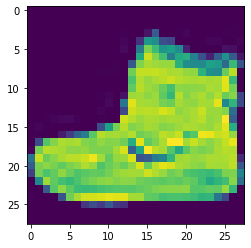

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0] # 신발=9 

9

In [8]:
np.where(y_train==9)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)

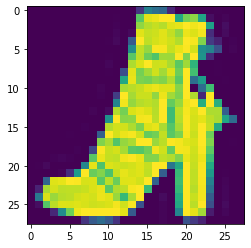

In [9]:
plt.imshow(x_train[11])

### 데이터구조 

`-` ${\bf X}$: (60000,28,28)

`-` ${\bf y}$: (60000,1) $y=0,1,2,\dots,9$

## 예제1

### 데이터 정리 

`-` y=0,1에 대응하는 이미지만 정리하자. (우리가 배운건 로지스틱이니깐) 

(예비학습코드)

In [10]:
np.array([True,False,True,False,]) | np.array([True,True,False,False])

array([ True,  True,  True, False])

In [11]:
X = x_train[(y_train==1) | (y_train==0)].reshape(-1,28*28)
y = y_train[(y_train==1) | (y_train==0)].reshape(-1,1)
XX = x_test[(y_test==1) | (y_test==0)].reshape(-1,28*28)
yy = y_test[(y_test==1) | (y_test==0)].reshape(-1,1)

In [12]:
tf.random.set_seed(43054) # 43054
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='sgd',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=500,batch_size=12000) 

Epoch 1/500
1/1 [==============================] - 0s 127ms/step - loss: 23.6410
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 2048.4263
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 10669.9619
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1531.8005
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 555.8582
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 214.4529
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 180.1079
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 167.2022
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 156.5931
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 146.5200
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 137.1044
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 128.0815
Epoch 13/500
1/1 [=============

In [13]:
np.mean(y == (net(X)>0.5)) # 거의 100퍼..

0.9895

In [14]:
np.mean(yy== (net(XX)> 0.5)) # test err도 나쁘지 않아

0.9855

### **풀이1: 은닉층을 포함한 신경망**

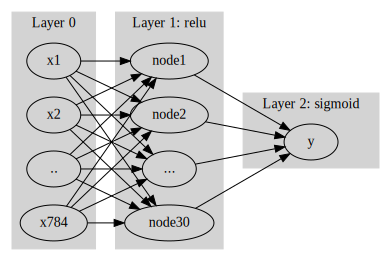

In [15]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: sigmoid"
}
''')

In [16]:
tf.random.set_seed(43054) # 43054
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='sgd',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 140ms/step - loss: 32.5990
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 6041.9629
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 45273.3008
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9923
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8082
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7354
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6921
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6903
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6857
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6701
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6118
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5392
Epoch 13/100
1/1 [==============================] -

In [17]:
np.mean(y == (net(X)>0.5)) , np.mean(yy== (net(XX)> 0.5)) 

(0.6119166666666667, 0.629)

In [18]:
np.mean(y == (net.predict(X)>0.5)) , np.mean(yy== (net.predict(XX)> 0.5))  ## 같은코드 

(0.6119166666666667, 0.629)

### **풀이2: 옵티마이저 개선**

In [19]:
tf.random.set_seed(43054) # 43054
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 144ms/step - loss: 32.5990
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 62.4840
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 22.2778
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 5.6634
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1100
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8669
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2434
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4865
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1794
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4.3302
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 4.2609
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 4.4693
Epoch 13/100
1/1 [==============================] - 0s

In [20]:
np.mean(y == (net(X)>0.5)) # 거의 100퍼..

0.9851666666666666

In [21]:
np.mean(yy== (net(XX)> 0.5)) # test err도 나쁘지 않아

0.979

### **풀이3: 컴파일시 metrics=['accuracy'] 추가**

In [22]:
tf.random.set_seed(43054) # 43054
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy, metrics=['accuracy'])
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 164ms/step - loss: 32.5990 - accuracy: 0.4780
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 62.4840 - accuracy: 0.5049
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 22.2778 - accuracy: 0.6697
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 5.6634 - accuracy: 0.9117
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1100 - accuracy: 0.8633
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8669 - accuracy: 0.8176
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2434 - accuracy: 0.8454
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4865 - accuracy: 0.8931
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1794 - accuracy: 0.9256
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4.3302 - accuracy: 0.9439
Epoch 11/100
1/1 [=

In [23]:
np.mean(y == (net(X)>0.5)) # 거의 100퍼..

0.9851666666666666

In [24]:
net.evaluate(X,y)

375/375 [==============================] - 0s 347us/step - loss: 0.6171 - accuracy: 0.9852


[0.6171361804008484, 0.9851666688919067]

In [25]:
np.mean(yy== (net(XX)> 0.5)) # test err도 나쁘지 않아

0.979

In [26]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 538us/step - loss: 0.8388 - accuracy: 0.9790


[0.8388426899909973, 0.9789999723434448]

### 풀이4: 확률적경사하강법 이용

In [27]:
tf.random.set_seed(43054) # 43054
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy, metrics=['accuracy'])
net.fit(X,y,epochs=10,batch_size=1200) 

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 16.8976 - accuracy: 0.7893
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 3.8567 - accuracy: 0.9572
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.8241 - accuracy: 0.9674
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 1.2483 - accuracy: 0.9783
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0139 - accuracy: 0.9809
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.9817
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.9824
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7420 - accuracy: 0.9827
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.9835
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.9840


In [28]:
np.mean(y == (net(X)>0.5)) # 거의 100퍼..

0.9845833333333334

In [29]:
net.evaluate(X,y)

375/375 [==============================] - 0s 335us/step - loss: 0.6280 - accuracy: 0.9846


[0.628049373626709, 0.98458331823349]

In [30]:
np.mean(yy== (net(XX)> 0.5)) # test err도 나쁘지 않아

0.9815

In [31]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 516us/step - loss: 0.8386 - accuracy: 0.9815


[0.8386411666870117, 0.9815000295639038]

## 예제2

### 데이터정리 

In [52]:
X = x_train.reshape(-1,28*28)
y = y_train.reshape(-1,1) 
XX = x_test.reshape(-1,28*28)
yy = y_test.reshape(-1,1) 

In [53]:
y=tf.keras.utils.to_categorical(y)
yy=tf.keras.utils.to_categorical(yy)

### 풀이1: 아까 예제1 정도의 모델로!

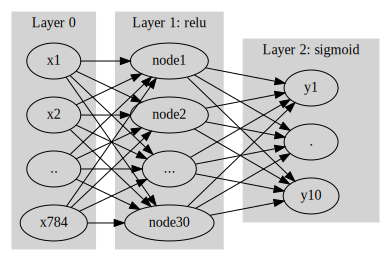

In [54]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "y10"
    "node2" -> "y10"
    "..." -> "y10"
    "node30" -> "y10"
    
    "node1" -> "y1"
    "node2" -> "y1"
    "..." -> "y1"
    "node30" -> "y1"
    
    "node1" -> "."
    "node2" -> "."
    "..." -> "."
    "node30" -> "."
    
    label = "Layer 2: sigmoid"
}
''')

In [40]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy']) 
net.fit(X,y,epochs=100,batch_size=600) 

Epoch 1/100
100/100 [==============================] - 0s 920us/step - loss: 15.2989 - accuracy: 0.4801
Epoch 2/100
100/100 [==============================] - 0s 901us/step - loss: 1.8916 - accuracy: 0.4550
Epoch 3/100
100/100 [==============================] - 0s 905us/step - loss: 1.6494 - accuracy: 0.4969
Epoch 4/100
100/100 [==============================] - 0s 903us/step - loss: 1.5121 - accuracy: 0.5307
Epoch 5/100
100/100 [==============================] - 0s 900us/step - loss: 1.3805 - accuracy: 0.5591
Epoch 6/100
100/100 [==============================] - 0s 883us/step - loss: 1.2827 - accuracy: 0.5757
Epoch 7/100
100/100 [==============================] - 0s 876us/step - loss: 1.2101 - accuracy: 0.5873
Epoch 8/100
100/100 [==============================] - 0s 874us/step - loss: 1.1511 - accuracy: 0.5990
Epoch 9/100
100/100 [==============================] - 0s 915us/step - loss: 1.1012 - accuracy: 0.6097
Epoch 10/100
100/100 [==============================] - 0s 892us/step - 

In [41]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 338us/step - loss: 0.5581 - accuracy: 0.8199


[0.5581112504005432, 0.8198999762535095]

### 풀이2: 더 깊은 신경망 

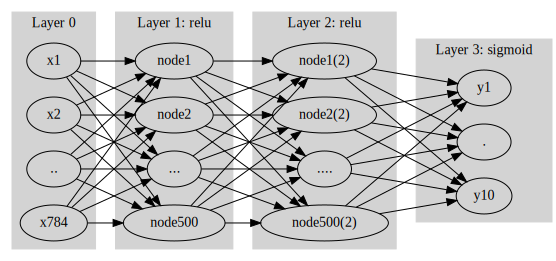

In [55]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node500"
    "x2" -> "node500"
    ".." -> "node500"
    "x784" -> "node500"


    label = "Layer 1: relu"
}

subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "node1(2)"
    "node2" -> "node1(2)"
    "..." -> "node1(2)"
    "node500" -> "node1(2)"

    "node1" -> "node2(2)"
    "node2" -> "node2(2)"
    "..." -> "node2(2)"
    "node500" -> "node2(2)"
    
    "node1" -> "...."
    "node2" -> "...."
    "..." -> "...."
    "node500" -> "...."
    
    "node1" -> "node500(2)"
    "node2" -> "node500(2)"
    "..." -> "node500(2)"
    "node500" -> "node500(2)"

    
    label = "Layer 2: relu"
}

subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1(2)" -> "y10"
    "node2(2)" -> "y10"
    "...." -> "y10"
    "node500(2)" -> "y10"
    
    "node1(2)" -> "y1"
    "node2(2)" -> "y1"
    "...." -> "y1"
    "node500(2)" -> "y1"
    
    "node1(2)" -> "."
    "node2(2)" -> "."
    "...." -> "."
    "node500(2)" -> "."
    
    label = "Layer 3: sigmoid"
}
''')

In [56]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy']) 
net.fit(X,y,epochs=100,batch_size=600) 

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 13.6950 - accuracy: 0.7260
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 1.3744 - accuracy: 0.8098
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.9224 - accuracy: 0.8270
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.8423
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.8571
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8685
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8745
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8791
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8908
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3067 - accur

In [57]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 522us/step - loss: 0.6244 - accuracy: 0.8824


[0.6243994832038879, 0.8823999762535095]

In [58]:
net.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 500)               250500    
                                                                 
 dense_22 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


### 데이터 다시 정리 (데이터 자체를 2D로 해석하자) 

`-` 데이터를 다시 정리 // X를 펼치치 않음 + 이미지의 차원을 (28,28,1)로 통일.

In [45]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.constant(tf.keras.utils.to_categorical(y_train),dtype=tf.float64)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.constant(tf.keras.utils.to_categorical(y_test),dtype=tf.float64)

### 풀이3: CNN

In [46]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Convolution2D(30,(5,5),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Convolution2D(30,(5,5),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(10,activation='softmax'))

In [47]:
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy']) 
net.fit(X,y,epochs=20,batch_size=600) 

Epoch 1/20
100/100 [==============================] - 5s 45ms/step - loss: 3.6700 - accuracy: 0.5986
Epoch 2/20
100/100 [==============================] - 5s 46ms/step - loss: 0.6959 - accuracy: 0.7712
Epoch 3/20
100/100 [==============================] - 5s 46ms/step - loss: 0.5487 - accuracy: 0.8138
Epoch 4/20
100/100 [==============================] - 5s 45ms/step - loss: 0.4758 - accuracy: 0.8371
Epoch 5/20
100/100 [==============================] - 5s 45ms/step - loss: 0.4271 - accuracy: 0.8519
Epoch 6/20
100/100 [==============================] - 5s 45ms/step - loss: 0.3953 - accuracy: 0.8618
Epoch 7/20
100/100 [==============================] - 5s 45ms/step - loss: 0.3670 - accuracy: 0.8702
Epoch 8/20
100/100 [==============================] - 5s 46ms/step - loss: 0.3466 - accuracy: 0.8773
Epoch 9/20
100/100 [==============================] - 5s 46ms/step - loss: 0.3346 - accuracy: 0.8811
Epoch 10/20
100/100 [==============================] - 5s 46ms/step - loss: 0.3166 - accura

In [48]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 964us/step - loss: 0.3827 - accuracy: 0.8772


[0.3827328681945801, 0.8772000074386597]

In [49]:
net.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 30)          22530     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               